## Models Results Análisis




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import GradientBoostingRegressor


In [ ]:
results_columns = ["model_tested", "rsme", "acceptable_weighted_ratio_1d", "acceptable_weighted_ratio_7d"]
rt_row = ["Regression Tree", 1424.267595, 0.20, 0.35]
rf_row = ["Regression Forest", 1147.583921, 0.27, 0.37]
gb_row = ["Gradient Boosting", 1748.503188, 0.28, 0.50]
nn_row = ["Neural Network", 2500, 0.31, 0.21]


In [ ]:
results_df = pd.DataFrame([rt_row, rf_row, gb_row, nn_row], columns = results_columns)

In [ ]:
results_df

,model_tested,rsme,acceptable_weighted_ratio_1d,acceptable_weighted_ratio_7d
0,Regression Tree,1424.267595,0.20,0.35
1,Regression Forest,1147.583921,0.27,0.37
2,Gradient Boosting,1748.503188,0.28,0.50
3,Neural Network,2500.000000,0.31,0.21


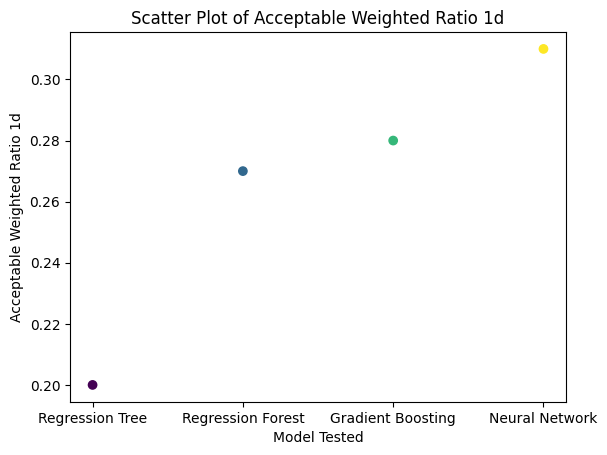

In [ ]:
fig, ax = plt.subplots()
# Scatter plot with different colors for each point
scatter = ax.scatter(results_df['model_tested'], results_df['acceptable_weighted_ratio_1d'], c=results_df.index, cmap='viridis')
# Set labels and title
ax.set_xlabel('Model Tested')
ax.set_ylabel('Acceptable Weighted Ratio 1d')
ax.set_title('Scatter Plot of Acceptable Weighted Ratio 1d')
# Show the plot
plt.show()

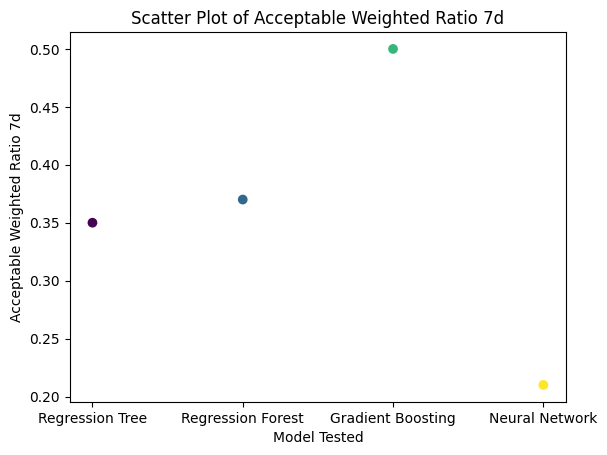

In [ ]:
fig, ax = plt.subplots()
# Scatter plot with different colors for each point
scatter = ax.scatter(results_df['model_tested'], results_df['acceptable_weighted_ratio_7d'], c=results_df.index, cmap='viridis')
# Set labels and title
ax.set_xlabel('Model Tested')
ax.set_ylabel('Acceptable Weighted Ratio 7d')
ax.set_title('Scatter Plot of Acceptable Weighted Ratio 7d')
# Show the plot
plt.show()

The Neural Network Model tester shows the best result for the next day prediction, but the Gradient Boosting Model shows the best results for a 7 day prediction, and also this model results for next day are only slightly belo that Neural Network model results.

The Gradient Boosting Model is choosen for this project

## Final training and evaluation for the Gradient Boosting Model

For the Selected model we will proceed to train it with the full training dataset and evaluet it with the test dataset to check if the consistency is mantained and optiain the final model

##Full Training

In [ ]:
#Load DataFrame
!wget https://github.com/AndresLDF/ML-Zoomcamp-Capstone2-BitCoinPricePrediction/raw/main/Datasets/BCP_extended_dataframe.csv
df = pd.read_csv("BCP_extended_dataframe.csv")
#Testing DataFrames
dfX = df.iloc[:,1:-2]
dfy = df.iloc[:,-2:]
dfX_fulltrain, dfX_test, dfy_fulltrain, dfy_test  = train_test_split(dfX, dfy, test_size=0.2, random_state= 4)
dfX_train, dfX_eval, dfy_train, dfy_eval = train_test_split(dfX_fulltrain, dfy_fulltrain, test_size=0.25, random_state= 4)
dfX_fulltrain = dfX_fulltrain.reset_index(drop = True)
dfX_test = dfX_test.reset_index(drop = True)
dfy_fulltrain = dfy_fulltrain.reset_index(drop = True)
dfy_test = dfy_test.reset_index(drop = True)
dfX_train = dfX_train.reset_index(drop = True)
dfX_eval = dfX_eval.reset_index(drop = True)
dfy_train = dfy_train.reset_index(drop = True)
dfy_eval = dfy_eval.reset_index(drop = True)

dfX_test.shape, dfy_test.shape, dfX_train.shape, dfy_train.shape, dfX_eval.shape, dfy_eval.shape

--2024-01-22 19:27:02--  https://github.com/AndresLDF/ML-Zoomcamp-Capstone2-BitCoinPricePrediction/raw/main/Datasets/BCP_extended_dataframe.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AndresLDF/ML-Zoomcamp-Capstone2-BitCoinPricePrediction/main/Datasets/BCP_extended_dataframe.csv [following]
--2024-01-22 19:27:02--  https://raw.githubusercontent.com/AndresLDF/ML-Zoomcamp-Capstone2-BitCoinPricePrediction/main/Datasets/BCP_extended_dataframe.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 218589 (213K) [text/plain]
Saving to: ‘BCP_extended_dataframe.csv.6’

BCP_extended_datafr 100%[====

((534, 6), (534, 2), (1600, 6), (1600, 2), (534, 6), (534, 2))

In [ ]:
dfX

,open,volume_btc,volume_eur,7_days_a,30_days_a,90_days_a
0,532.05,83410.070000,1.548400e+02,0.12,-0.69,-1.06
1,537.83,194358.240000,3.623700e+02,1.85,-0.57,-1.13
2,539.26,204407.280000,3.775400e+02,3.84,-0.40,-1.19
3,542.80,193789.480000,3.560500e+02,5.10,-0.17,-1.25
4,547.69,234580.430000,4.229100e+02,6.09,0.11,-1.31
...,...,...,...,...,...,...
2663,38515.00,527.531216,2.104217e+07,-47.00,245.15,183.70
2664,39891.00,388.639180,1.549699e+07,-123.11,235.62,183.82
2665,39875.00,304.359594,1.216951e+07,88.04,232.69,184.32
2666,40000.00,115.594063,4.602262e+06,242.11,216.90,184.60


In [ ]:
def regressor_gb_trainer(X_train, y_train, max_depth, min_samples_leaf, n_estimators=50):
    gb_regressor = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=0.1, max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=42)
    gb_regressor.fit(X_train, y_train)
    return gb_regressor

In [ ]:
def model_evaluator(dfy_eval, y_eval_pred, result_indentificator_string, aceptable_error=3):
  if result_indentificator_string == "next_week_value":
    individual_errors = (dfy_eval[result_indentificator_string] - y_eval_pred[:,1])/dfy_eval[result_indentificator_string]*100
  elif result_indentificator_string == "next_day_value":
    individual_errors = (dfy_eval[result_indentificator_string] - y_eval_pred[:,0])/dfy_eval[result_indentificator_string]*100
  elif result_indentificator_string == "one_value":
    individual_errors = (dfy_eval - y_eval_pred)/dfy_eval*100
  else:
    raise ValueError("Please enter a valid value for the argument result_indentificator_string")
  acceptabe_predictins_7d = (np.abs(individual_errors)<=aceptable_error).sum()
  moderate_unacceptable_predictins_7d=(np.abs(individual_errors)>aceptable_error).sum() - (np.abs(individual_errors)>(aceptable_error*5/3)).sum()
  highly_unacceptable_predictions_7d=(np.abs(individual_errors)>=(aceptable_error*5/3)).sum() - (np.abs(individual_errors)>20).sum()
  blatant_unacceptable_predictions_7d = (np.abs(individual_errors)>20).sum()
  total_unacceptable_predictions = (np.abs(individual_errors)>aceptable_error).sum()
  acceptable_ratio = acceptabe_predictins_7d/(total_unacceptable_predictions+acceptabe_predictins_7d)
  acceptable_ratio = np.round(acceptable_ratio,2)
  acceptable_weighted_ratio = acceptabe_predictins_7d/(moderate_unacceptable_predictins_7d+(highly_unacceptable_predictions_7d*2)+(blatant_unacceptable_predictions_7d*4)+acceptabe_predictins_7d)
  acceptable_weighted_ratio = np.round(acceptable_weighted_ratio,2)
  #print(f"The Acceptable Ratio (accuracy) is {acceptable_ratio}")
  #print(f"the Weighted Ratio is {acceptable_weighted_ratio}")
  return individual_errors, acceptable_ratio, acceptable_weighted_ratio

In [ ]:
max_depth = 15
min_samples_leaf = 1
n_estimators = 400
result_columns = ["n_estimators", "max_depth", "min_samples_leaf","rsme", "acceptable_ratio_1d", "acceptable_weighted_ratio_1d", "acceptable_ratio_7d", "acceptable_weighted_ratio_7d" ]
results = pd.DataFrame(columns=result_columns)

y_fulltrain_1d = dfy_fulltrain['next_day_value']
model_1d = regressor_gb_trainer(dfX_fulltrain, y_fulltrain_1d, max_depth, min_samples_leaf, n_estimators=200)
y_test_pred_1d = model_1d.predict(dfX_test)
rsme_1d = mean_squared_error(dfy_test["next_day_value"], y_test_pred_1d, squared=False)
errors_1d, acceptable_ratio_1d, acceptable_weighted_ratio_1d = model_evaluator(dfy_test["next_day_value"], y_test_pred_1d, "one_value", aceptable_error=1.5)
print (f"For a max_depth of {max_depth} and a min_samples_leaf of {min_samples_leaf}, the 1 Day Prediction Ratios are:")
print (f"acceptable_ratio_1d: {acceptable_ratio_1d} ")
print (f"acceptable_weighted_ratio_1d: {acceptable_weighted_ratio_1d} ")


y_fulltrain_7d = dfy_fulltrain['next_week_value']
model_7d = regressor_gb_trainer(dfX_fulltrain, y_fulltrain_7d, max_depth, min_samples_leaf, n_estimators=200)
y_test_pred_7d = model_7d.predict(dfX_test)
rsme_7d = mean_squared_error(dfy_test["next_week_value"], y_test_pred_7d, squared=False)
errors_7d, acceptable_ratio_7d, acceptable_weighted_ratio_7d = model_evaluator(dfy_test["next_week_value"], y_test_pred_7d, "one_value", aceptable_error=3)
print (f"For a max_depth of {max_depth} and a min_samples_leaf of {min_samples_leaf}, the 7 Day Prediction Ratios are:")
print (f"acceptable_ratio_7d: {acceptable_ratio_7d} ")
print (f"acceptable_weighted_ratio_7d: {acceptable_weighted_ratio_7d} ")

rsme = (rsme_1d + errors_7d)/2

new_row = [n_estimators, max_depth , min_samples_leaf, rsme, acceptable_ratio_1d, acceptable_weighted_ratio_1d, acceptable_ratio_7d, acceptable_weighted_ratio_7d]
new_row_df = pd.DataFrame([new_row], columns=results.columns)

results = pd.concat([results, new_row_df], ignore_index=True)

For a max_depth of 15 and a min_samples_leaf of 1, the 1 Day Prediction Ratios are:
acceptable_ratio_1d: 0.43 
acceptable_weighted_ratio_1d: 0.31 
For a max_depth of 15 and a min_samples_leaf of 1, the 7 Day Prediction Ratios are:
acceptable_ratio_7d: 0.64 
acceptable_weighted_ratio_7d: 0.5 


The Model trained with the full information has shown better results for 1 days and similar resulst for 7 days